In [1]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123433 sha256=c614c882dd76af3d5eb58502d67a28baf438eee63e7cc068e2ac87e1a57fe0af
  Stored in directory: /tmp/pip-ephem-wheel-cache-rplxn0vq/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos3_nodes.sg",
                      path_links=path_directory + "erdos3_links.sg")
S.describe()

Nb of Nodes :  7
Nb of segmented nodes :  7.0
Nb of links :  18
Nb of segmented links :  32.0
Nb of event times :  28


In [2]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


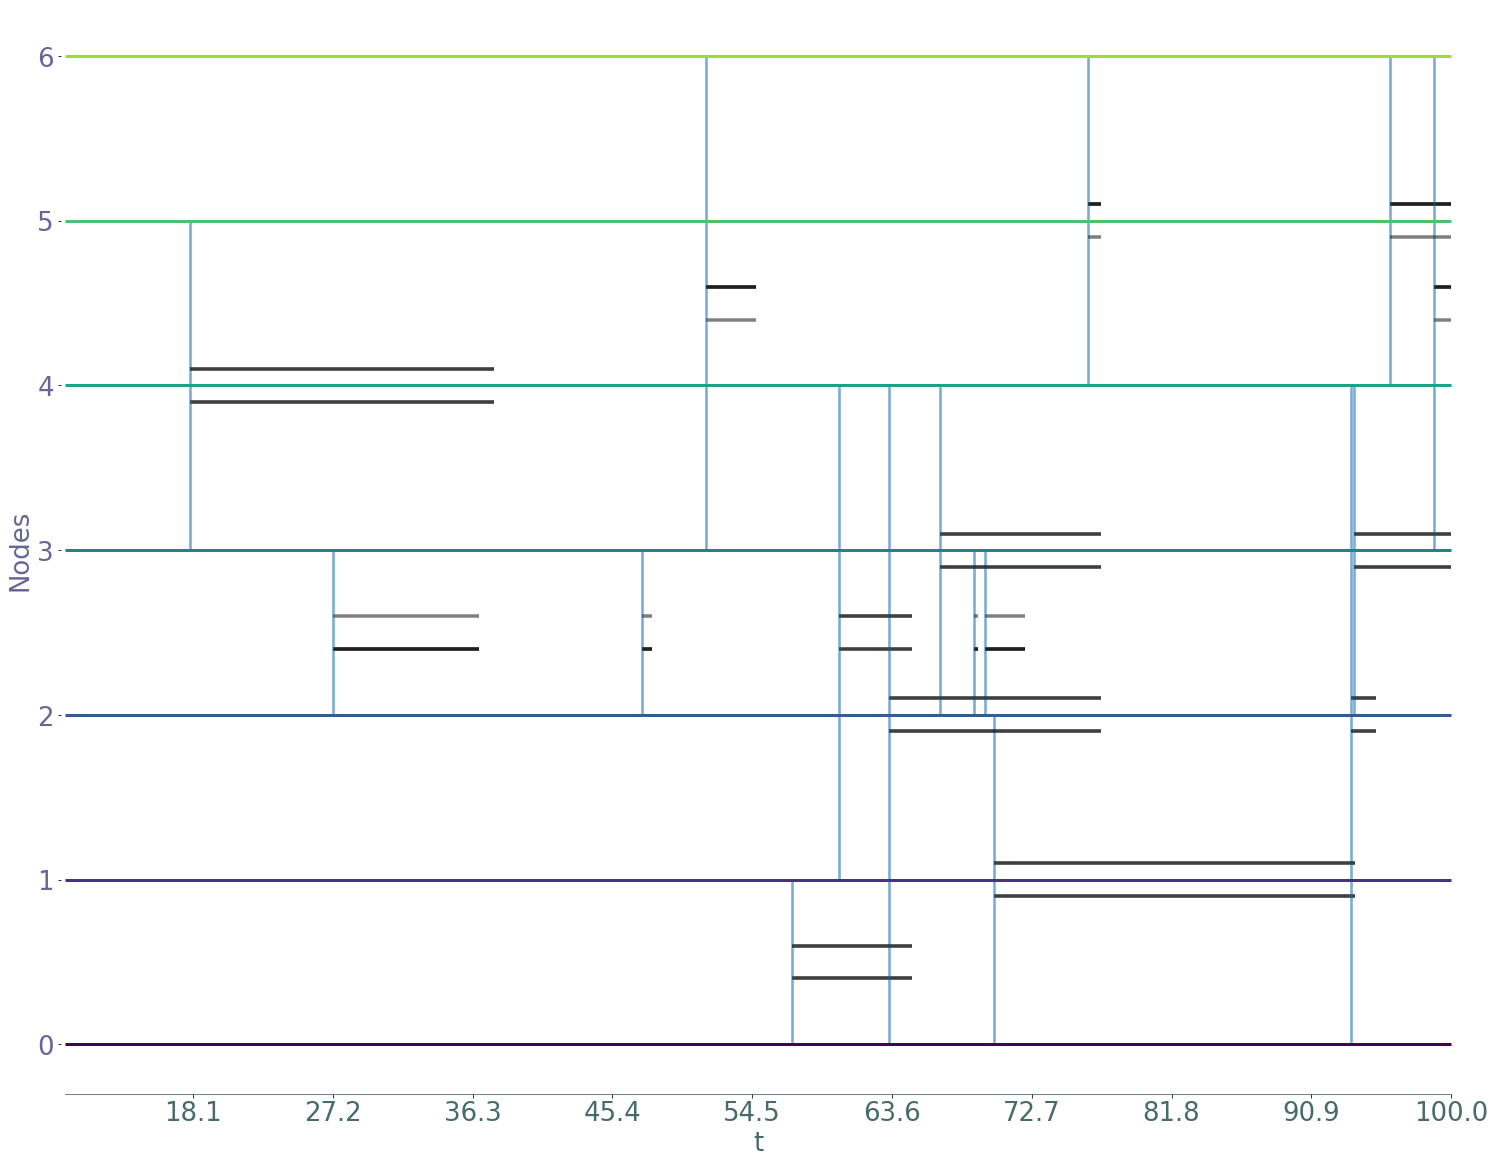

In [3]:
S.plot()

In [4]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [5]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [6]:
events, events_reverse = bt.events_dic(nouveau)

In [7]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [8]:
node = 0

In [9]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [10]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [11]:
lat_triplet[3]

[[68.95059243018653, 68.95059243018653, 3],
 [69.1790601741807, 69.1790601741807, 3],
 [69.64910543402142, 69.64910543402142, 3],
 [70.23444628420312, 70.23444628420312, 2],
 [72.23774336400886, 72.23774336400886, 2],
 [95.11103312546415, 98.88526302134693, 3]]

In [12]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

In [13]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (86.96128165180458, 87.50135191009633)

In [14]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (86.96128165180458, 87.50135191009633)

In [15]:
cur_best[4]

{9.79195986837389: (-inf, inf),
 17.90658959694391: (-inf, inf),
 27.187618198991043: (-inf, inf),
 36.731545484736046: (-inf, inf),
 37.67072586510072: (-inf, inf),
 47.31156026743152: (-inf, inf),
 47.95196384950668: (-inf, inf),
 51.470328617690704: (-inf, inf),
 54.76832662125281: (-inf, inf),
 57.12760500273923: (-inf, inf),
 60.135906453911744: (60.135906453911744, 2),
 63.39211518035695: (63.39211518035695, 1),
 64.88065653836603: (64.88065653836603, 1),
 66.75320731422029: (66.75320731422029, 1),
 68.95059243018653: (68.95059243018653, 1),
 69.1790601741807: (69.1790601741807, 1),
 69.64910543402142: (69.64910543402142, 1),
 70.23444628420312: (70.23444628420312, 1),
 72.23774336400886: (72.23774336400886, 1),
 76.35106876066185: (76.35106876066185, 1),
 77.21364823494515: (77.21364823494515, 1),
 93.49537340842532: (93.49537340842532, 1),
 93.6868801145557: (93.6868801145557, 1),
 93.72953171387418: (93.72953171387418, 1),
 95.11103312546415: (95.11103312546415, 1),
 96.002419

In [16]:
pre[0]

{9.79195986837389: {},
 17.90658959694391: {},
 27.187618198991043: {},
 36.731545484736046: {},
 37.67072586510072: {},
 47.31156026743152: {},
 47.95196384950668: {},
 51.470328617690704: {},
 54.76832662125281: {},
 57.12760500273923: {(0, 0): (-1, -1)},
 60.135906453911744: {(0, 0): (-1, -1)},
 63.39211518035695: {(0, 0): (-1, -1)},
 64.88065653836603: {(0, 0): (-1, -1)},
 66.75320731422029: {(0, 0): (-1, -1)},
 68.95059243018653: {(0, 0): (-1, -1)},
 69.1790601741807: {(0, 0): (-1, -1)},
 69.64910543402142: {(0, 0): (-1, -1)},
 70.23444628420312: {(0, 0): (-1, -1)},
 72.23774336400886: {(0, 0): (-1, -1)},
 76.35106876066185: {(0, 0): (-1, -1)},
 77.21364823494515: {(0, 0): (-1, -1)},
 93.49537340842532: {(0, 0): (-1, -1)},
 93.6868801145557: {(0, 0): (-1, -1)},
 93.72953171387418: {(0, 0): (-1, -1)},
 95.11103312546415: {(0, 0): (-1, -1)},
 96.00241973000111: {},
 98.88526302134693: {},
 100.0: {}}

In [17]:
nouveau.link_presence[2]

[57.12760500273923,
 60.135906453911744,
 60.135906453911744,
 63.39211518035695,
 63.39211518035695,
 64.88065653836603]

In [18]:
edge = bt.edges(nouveau)

In [19]:
edge[0][3]

KeyError: 3

In [20]:
edge[3][4]

KeyError: 4

In [21]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

0 1 57.12760500273923 -1 -1 -1 -1
edge after 57.12760500273923 60.135906453911744
t1p,t2p 57.12760500273923 57.12760500273923
0 1 60.135906453911744 -1 -1 -1 -1
edge after 60.135906453911744 63.39211518035695
t1p,t2p 57.12760500273923 60.135906453911744
1 4 60.135906453911744 57.12760500273923 60.135906453911744 60.135906453911744 63.39211518035695
edge after 60.135906453911744 63.39211518035695
t1p,t2p 60.135906453911744 60.135906453911744
1 4 60.135906453911744 57.12760500273923 60.135906453911744 60.135906453911744 63.39211518035695
edge after 60.135906453911744 63.39211518035695
t1p,t2p 60.135906453911744 60.135906453911744
0 1 63.39211518035695 -1 -1 -1 -1
edge after 63.39211518035695 64.88065653836603
t1p,t2p 60.135906453911744 63.39211518035695
0 4 63.39211518035695 60.135906453911744 63.39211518035695 63.39211518035695 64.88065653836603
edge after 63.39211518035695 64.88065653836603
t1p,t2p 63.39211518035695 63.39211518035695
0 1 64.88065653836603 -1 -1 -1 -1
t1p,t2p 63.3921151

In [22]:
for e in G.graph[(3,77.72417383674939)]:
    print(e)

KeyError: (3, 77.72417383674939)

In [23]:
G.graph[(3,77.72417383674939)][(1, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [24]:
G.graph[(3,77.72417383674939)][(5, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [25]:
after[4]

{9.79195986837389: False,
 17.90658959694391: False,
 27.187618198991043: False,
 36.731545484736046: False,
 37.67072586510072: False,
 47.31156026743152: False,
 47.95196384950668: False,
 51.470328617690704: False,
 54.76832662125281: False,
 57.12760500273923: False,
 60.135906453911744: True,
 63.39211518035695: True,
 64.88065653836603: True,
 66.75320731422029: True,
 68.95059243018653: True,
 69.1790601741807: True,
 69.64910543402142: True,
 70.23444628420312: True,
 72.23774336400886: True,
 76.35106876066185: True,
 77.21364823494515: False,
 93.49537340842532: True,
 93.6868801145557: True,
 93.72953171387418: True,
 95.11103312546415: False,
 96.00241973000111: False,
 98.88526302134693: False,
 100.0: False}

In [26]:
before[4]

{9.79195986837389: False,
 17.90658959694391: False,
 27.187618198991043: False,
 36.731545484736046: False,
 37.67072586510072: False,
 47.31156026743152: False,
 47.95196384950668: False,
 51.470328617690704: False,
 54.76832662125281: False,
 57.12760500273923: False,
 60.135906453911744: False,
 63.39211518035695: True,
 64.88065653836603: True,
 66.75320731422029: True,
 68.95059243018653: True,
 69.1790601741807: True,
 69.64910543402142: True,
 70.23444628420312: True,
 72.23774336400886: True,
 76.35106876066185: True,
 77.21364823494515: True,
 93.49537340842532: False,
 93.6868801145557: True,
 93.72953171387418: True,
 95.11103312546415: True,
 96.00241973000111: False,
 98.88526302134693: False,
 100.0: False}

In [27]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [28]:
sigma_r

{(0, 9.79195986837389): vol(1,0),
 (0, 17.90658959694391): vol(1,0),
 (0, 27.187618198991043): vol(1,0),
 (0, 36.731545484736046): vol(1,0),
 (0, 37.67072586510072): vol(1,0),
 (0, 47.31156026743152): vol(1,0),
 (0, 47.95196384950668): vol(1,0),
 (0, 51.470328617690704): vol(1,0),
 (0, 54.76832662125281): vol(1,0),
 (0, 57.12760500273923): vol(1,0),
 (0, 60.135906453911744): vol(1,0),
 (0, 63.39211518035695): vol(1,0),
 (0, 64.88065653836603): vol(1,0),
 (0, 66.75320731422029): vol(1,0),
 (0, 68.95059243018653): vol(1,0),
 (0, 69.1790601741807): vol(1,0),
 (0, 69.64910543402142): vol(1,0),
 (0, 70.23444628420312): vol(1,0),
 (0, 72.23774336400886): vol(1,0),
 (0, 76.35106876066185): vol(1,0),
 (0, 77.21364823494515): vol(1,0),
 (0, 93.49537340842532): vol(1,0),
 (0, 93.6868801145557): vol(1,0),
 (0, 93.72953171387418): vol(1,0),
 (0, 95.11103312546415): vol(1,0),
 (0, 96.00241973000111): vol(1,0),
 (0, 98.88526302134693): vol(1,0),
 (0, 100.0): vol(1,0),
 (1, 9.79195986837389): vol(0,0

In [29]:
sigma_r[(4, 87.50135191009633)]

KeyError: (4, 87.50135191009633)

In [30]:
sigma_r[(4, 66.38830461464687)]

KeyError: (4, 66.38830461464687)

In [31]:
sigma_r[(0, 66.38830461464687)]

KeyError: (0, 66.38830461464687)

In [32]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [33]:
prev_next[4]

{}

In [34]:
contri[4]

{60.135906453911744: (9.79195986837389, 60.135906453911744),
 63.39211518035695: (63.39211518035695, 63.39211518035695),
 64.88065653836603: (64.88065653836603, 64.88065653836603),
 66.75320731422029: (66.75320731422029, 66.75320731422029),
 68.95059243018653: (68.95059243018653, 68.95059243018653),
 69.1790601741807: (69.1790601741807, 69.1790601741807),
 69.64910543402142: (69.64910543402142, 69.64910543402142),
 70.23444628420312: (70.23444628420312, 70.23444628420312),
 72.23774336400886: (72.23774336400886, 72.23774336400886),
 76.35106876066185: (76.35106876066185, 76.35106876066185),
 77.21364823494515: (77.21364823494515, 93.49537340842532),
 93.49537340842532: (77.21364823494515, 93.49537340842532),
 93.6868801145557: (93.6868801145557, 93.6868801145557),
 93.72953171387418: (93.72953171387418, 93.72953171387418),
 95.11103312546415: (95.11103312546415, 100.0)}

In [35]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [36]:
deltasvvt

{(0, 57.12760500273923): vol(0,0),
 (1, 57.12760500273923): vol(0,0),
 (0, 60.135906453911744): vol(0,0),
 (1, 60.135906453911744): vol(0,0),
 (0, 63.39211518035695): vol(0,0),
 (1, 63.39211518035695): vol(0,0),
 (0, 64.88065653836603): vol(0,0),
 (1, 64.88065653836603): vol(0,0),
 (4, 66.75320731422029): vol(0,0),
 (2, 66.75320731422029): vol(0,0),
 (4, 68.95059243018653): vol(0,0),
 (2, 68.95059243018653): vol(0,0),
 (4, 69.1790601741807): vol(0,0),
 (2, 69.1790601741807): vol(0,0),
 (4, 69.64910543402142): vol(0,0),
 (2, 69.64910543402142): vol(0,0),
 (0, 70.23444628420312): vol(0,0),
 (2, 70.23444628420312): vol(0,0),
 (0, 72.23774336400886): vol(0,0),
 (2, 72.23774336400886): vol(0,0),
 (0, 76.35106876066185): vol(0,0),
 (2, 76.35106876066185): vol(0,0),
 (0, 77.21364823494515): vol(0,0),
 (2, 77.21364823494515): vol(0,0),
 (0, 93.49537340842532): vol(0,0),
 (2, 93.49537340842532): vol(0,0),
 (0, 93.6868801145557): vol(0,0),
 (2, 93.6868801145557): vol(0,0),
 (0, 93.72953171387418

In [37]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

w_tp 2 96.00241973000111
w_tp 2 96.00241973000111 partial_sum[l_nei[v,t][ii+1][0]] vol(25.49770192054087,0) (sigma_r[(v,event[jjj])]/sigma_r[(w,t_p)] ) vol(1.1218476864137514,-1) contribution[w][t_p] vol(0,0)
resultat vol(25.49770192054087,0)
w_tp 6 96.00241973000111
w_tp 6 96.00241973000111 partial_sum[l_nei[v,t][ii+1][0]] vol(25.49770192054087,0) (sigma_r[(v,event[jjj])]/sigma_r[(w,t_p)] ) vol(1.0,0) contribution[w][t_p] vol(71.54623272291501,0)
resultat vol(97.04393464345588,0)


In [38]:
contribution

{1: {57.12760500273923: vol(0,0),
  60.135906453911744: vol(0,0),
  63.39211518035695: vol(0,0),
  64.88065653836603: vol(0,0),
  9.79195986837389: vol(0,0),
  17.90658959694391: vol(0,0),
  27.187618198991043: vol(0,0),
  36.731545484736046: vol(0,0),
  37.67072586510072: vol(0,0),
  47.31156026743152: vol(0,0),
  47.95196384950668: vol(0,0),
  51.470328617690704: vol(0,0),
  54.76832662125281: vol(0,0),
  66.75320731422029: vol(0,0),
  68.95059243018653: vol(0,0),
  69.1790601741807: vol(0,0),
  69.64910543402142: vol(0,0),
  70.23444628420312: vol(0,0),
  72.23774336400886: vol(0,0),
  76.35106876066185: vol(0,0),
  77.21364823494515: vol(0,0),
  93.49537340842532: vol(0,0),
  93.6868801145557: vol(0,0),
  93.72953171387418: vol(0,0),
  95.11103312546415: vol(0,0),
  96.00241973000111: vol(0,0),
  98.88526302134693: vol(0,0),
  100.0: vol(0,0)},
 0: {57.12760500273923: vol(0,0),
  60.135906453911744: vol(0,0),
  63.39211518035695: vol(0,0),
  64.88065653836603: vol(0,0),
  70.234446

In [39]:
contribution[4]

{60.135906453911744: vol(0,0),
 63.39211518035695: vol(0,0),
 64.88065653836603: vol(0,0),
 70.23444628420312: vol(0,0),
 72.23774336400886: vol(0,0),
 76.35106876066185: vol(0,0),
 77.21364823494515: vol(0,0),
 93.49537340842532: vol(0,0),
 93.6868801145557: vol(0,0),
 93.72953171387418: vol(0,0),
 66.75320731422029: vol(0,0),
 68.95059243018653: vol(0,0),
 69.1790601741807: vol(0,0),
 69.64910543402142: vol(0,0),
 100.0: vol(0,0),
 98.88526302134693: vol(0,0),
 96.00241973000111: vol(97.04393464345588,0),
 95.11103312546415: vol(97.04393464345588,0),
 9.79195986837389: vol(0,0),
 17.90658959694391: vol(0,0),
 27.187618198991043: vol(0,0),
 36.731545484736046: vol(0,0),
 37.67072586510072: vol(0,0),
 47.31156026743152: vol(0,0),
 47.95196384950668: vol(0,0),
 51.470328617690704: vol(0,0),
 54.76832662125281: vol(0,0),
 57.12760500273923: vol(0,0)}